In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure()
import math
%matplotlib inline
sns.set(font_scale=1.25)
plt.rc('figure', figsize=(18.5, 7.0), dpi='150')


### Load Physiology Data

In [64]:
physiology = pd.read_csv("../data/physiology/Sundayetal_thermallimits.csv")
physiology.dropna(inplace=True)

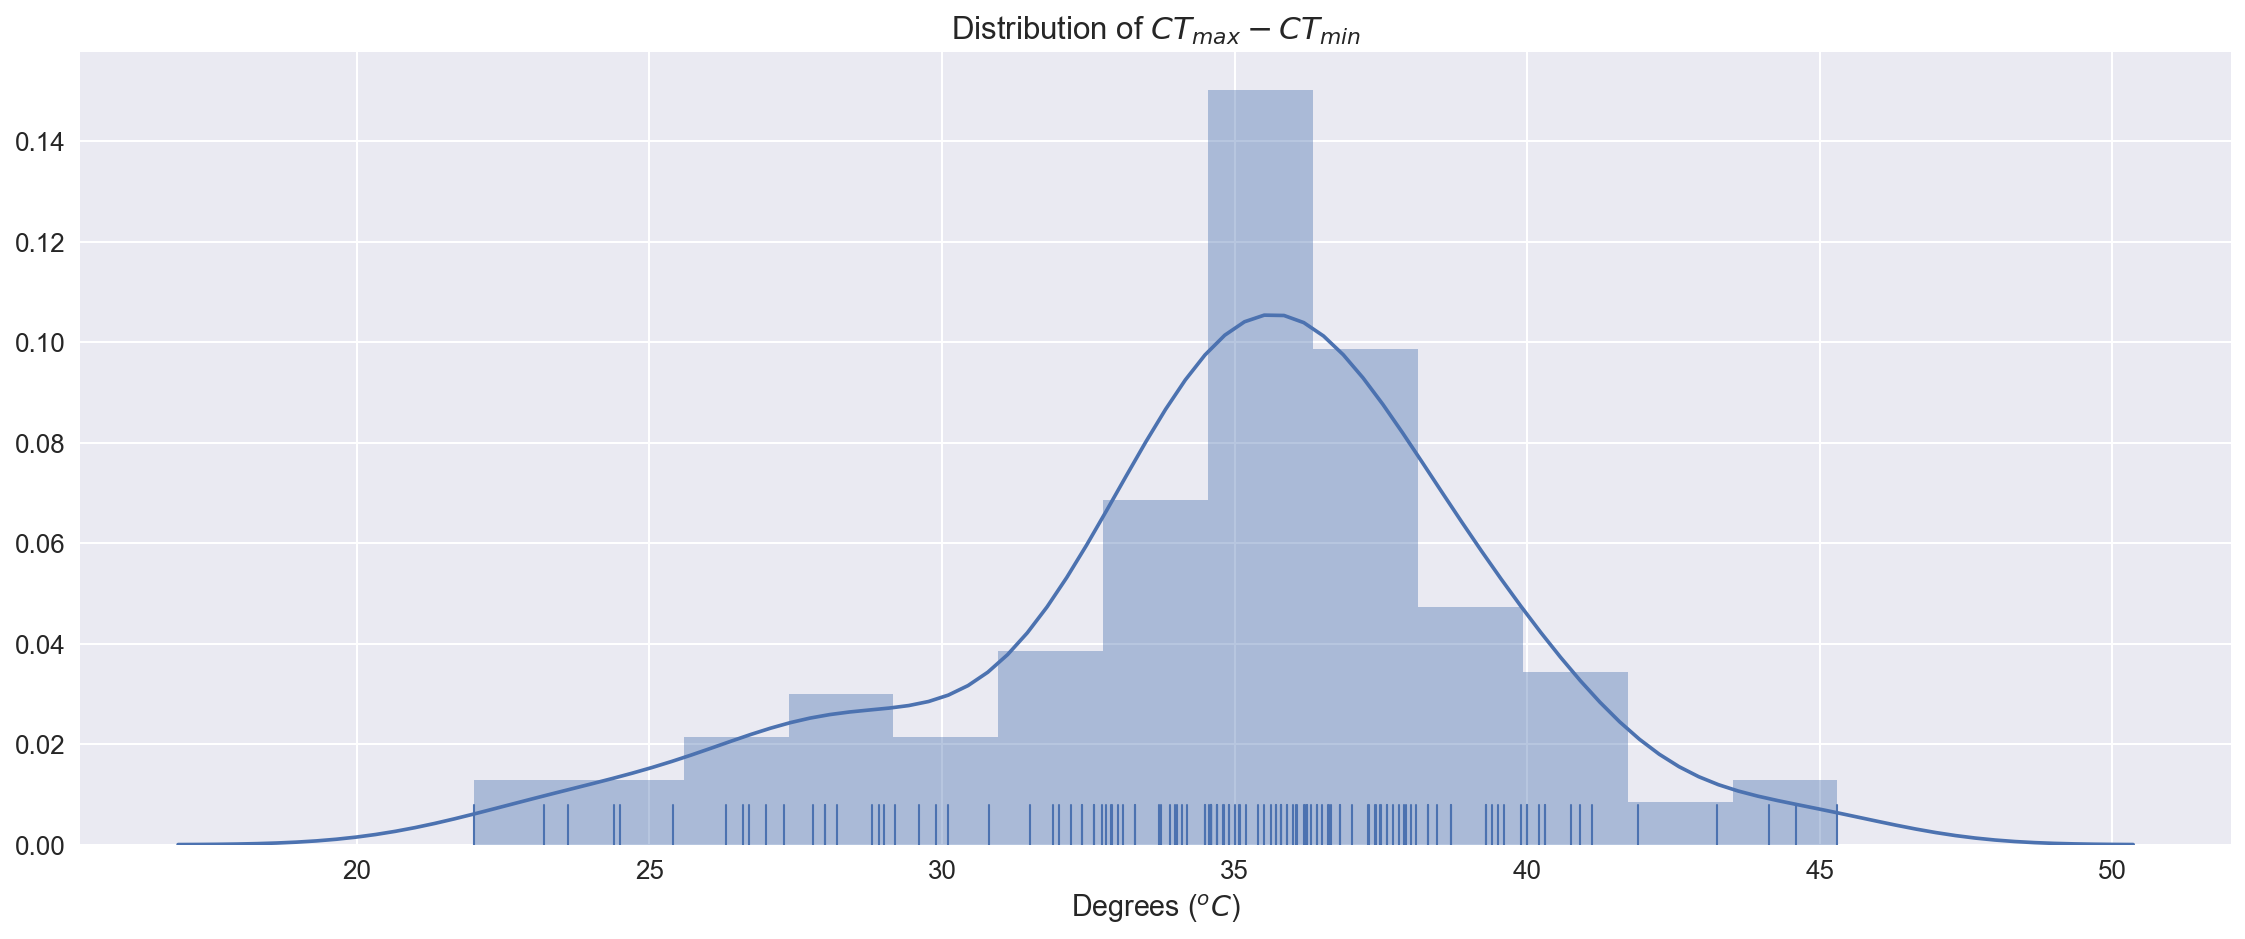

In [65]:
sns.distplot(physiology.tmax - physiology.tmin, rug=True)
plt.title("Distribution of $CT_{max} - CT_{min}$")
plt.xlabel("Degrees ($^oC$)")

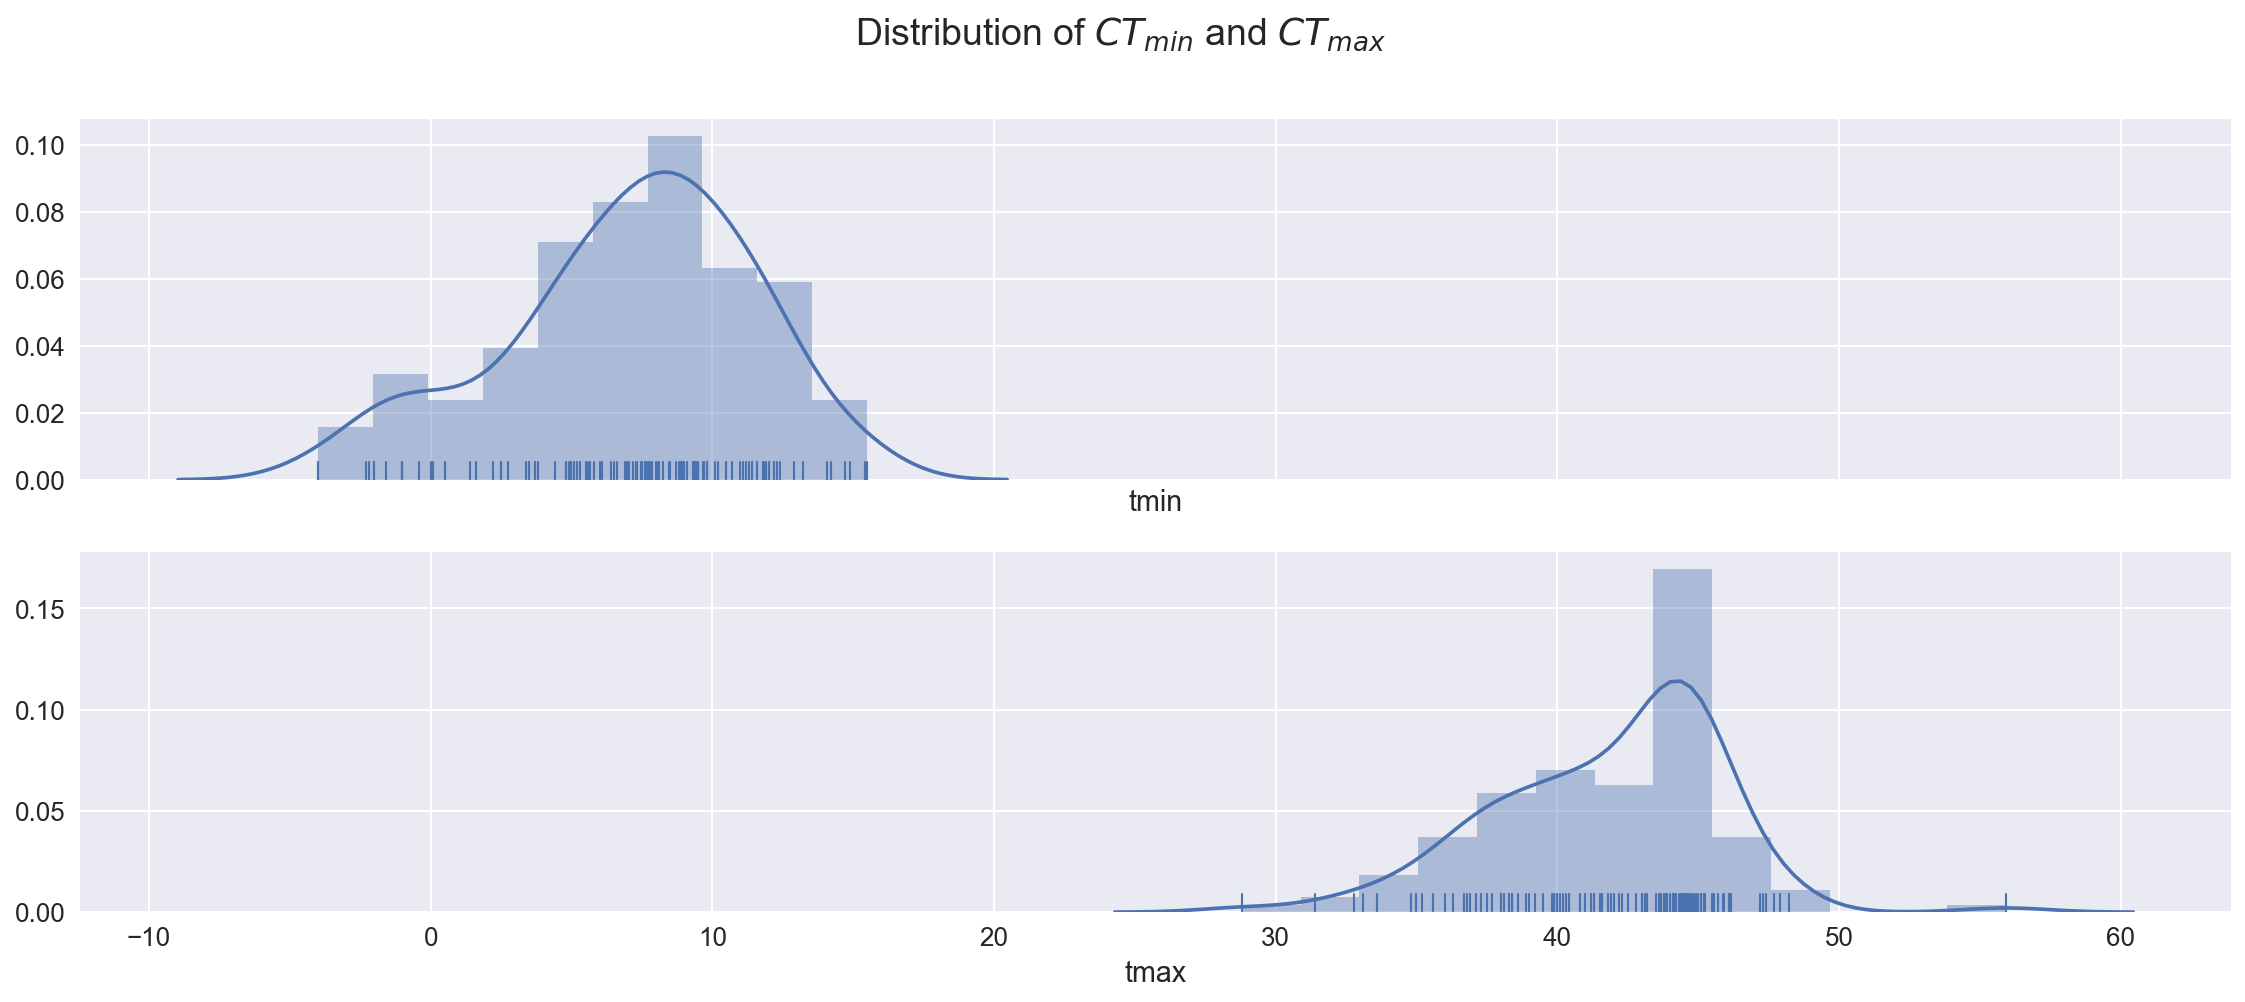

In [66]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.distplot(physiology.tmin, ax=ax[0], rug=True)
sns.distplot(physiology.tmax, ax=ax[1], rug=True)
fig.suptitle("Distribution of $CT_{min}$ and $CT_{max}$")

### Function Development
We start with a simple threshold function: 

In [198]:
def thresh_fitness_min(env_var, tmin):
    """
    0.9 if env_var > $CT_{min} , 0.1 otherwise
    """
    if isinstance(tmin, int):
        tmin = np.repeat(tmin, len(env_var))
    return [0.9 if e > c else 0.1 for e, c in zip(env_var, tmin)]

def thresh_fitness_max(env_var, tmax):
    """
    0.9 if env_var < $CT_{max}$, 0.1 otherwise
    """
    if isinstance(tmax, int):
        tmin = np.repeat(tmax, len(env_var))
    return [0.9 if e < c else 0.1 for e, c in zip(env_var, tmin)]

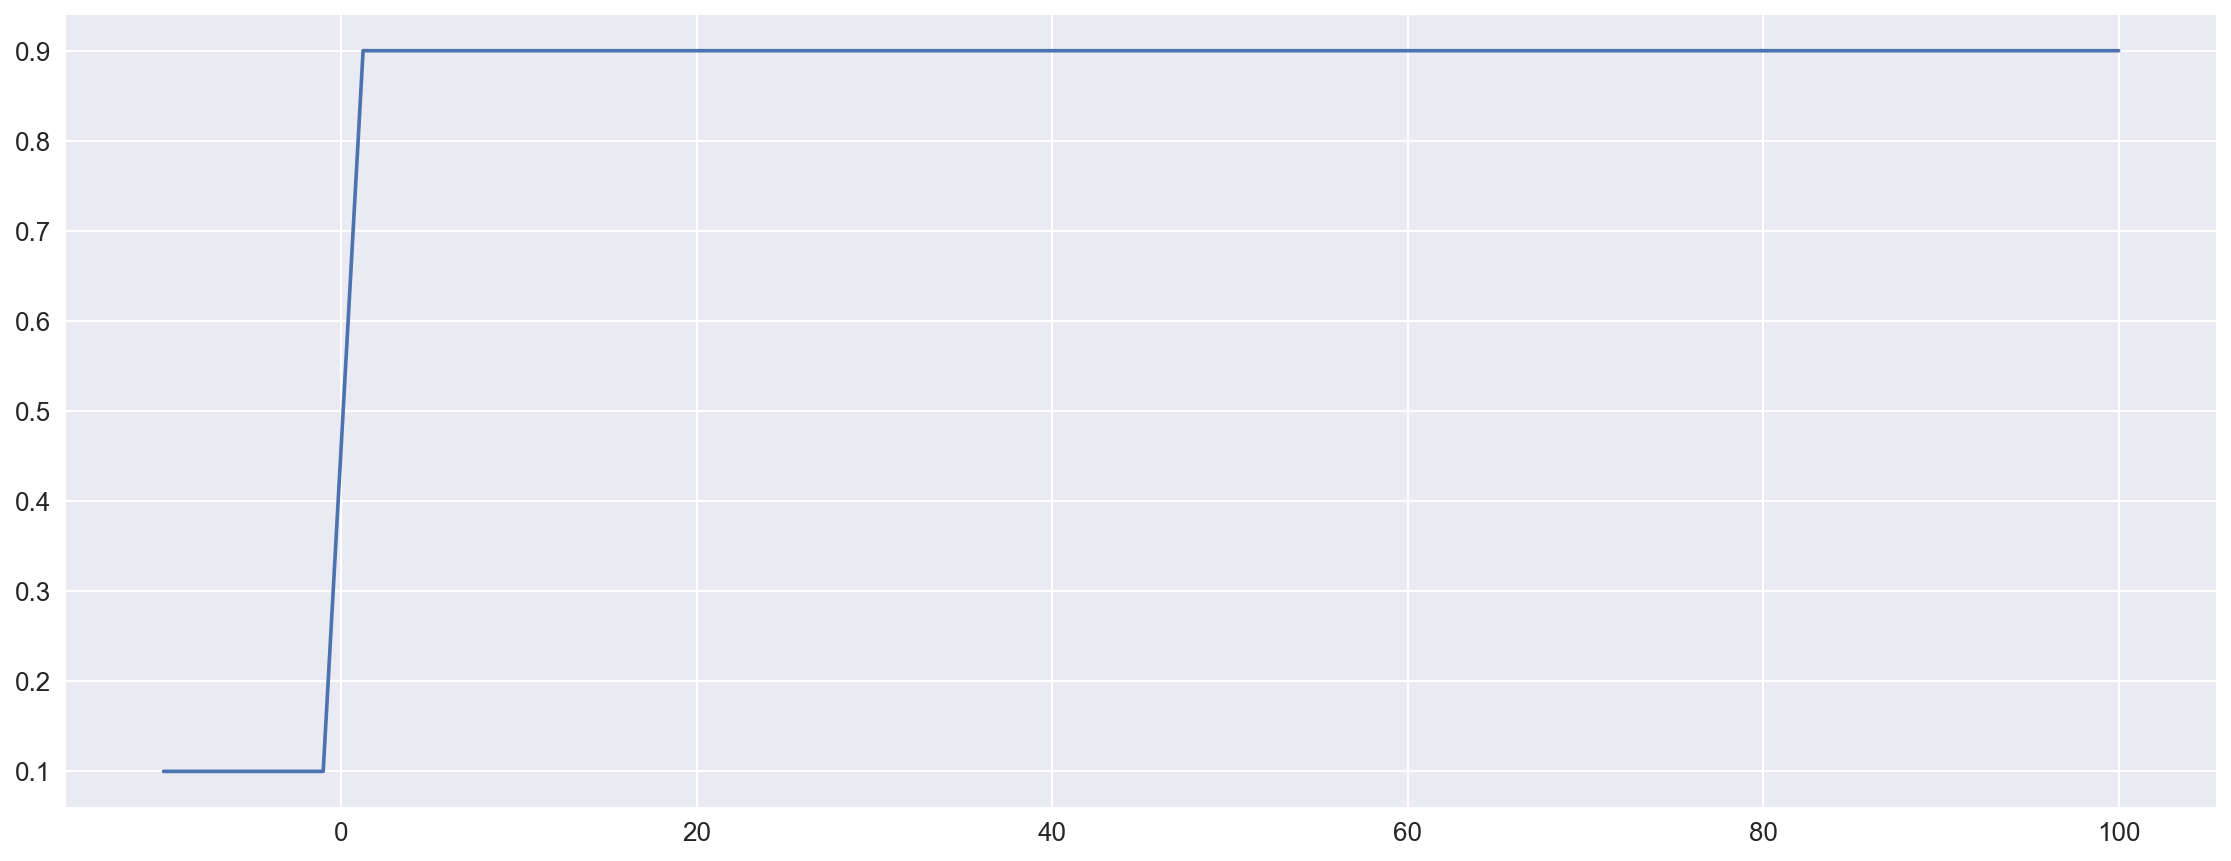

In [181]:
temps = np.linspace(-10, 100, 50)
plt.plot(temps, thresh_fitness_min(temps, np.repeat(0.5, len(temps))))

In [78]:
temps

array([-10.        ,  -8.96551724,  -7.93103448,  -6.89655172,
        -5.86206897,  -4.82758621,  -3.79310345,  -2.75862069,
        -1.72413793,  -0.68965517,   0.34482759,   1.37931034,
         2.4137931 ,   3.44827586,   4.48275862,   5.51724138,
         6.55172414,   7.5862069 ,   8.62068966,   9.65517241,
        10.68965517,  11.72413793,  12.75862069,  13.79310345,
        14.82758621,  15.86206897,  16.89655172,  17.93103448,
        18.96551724,  20.        ])

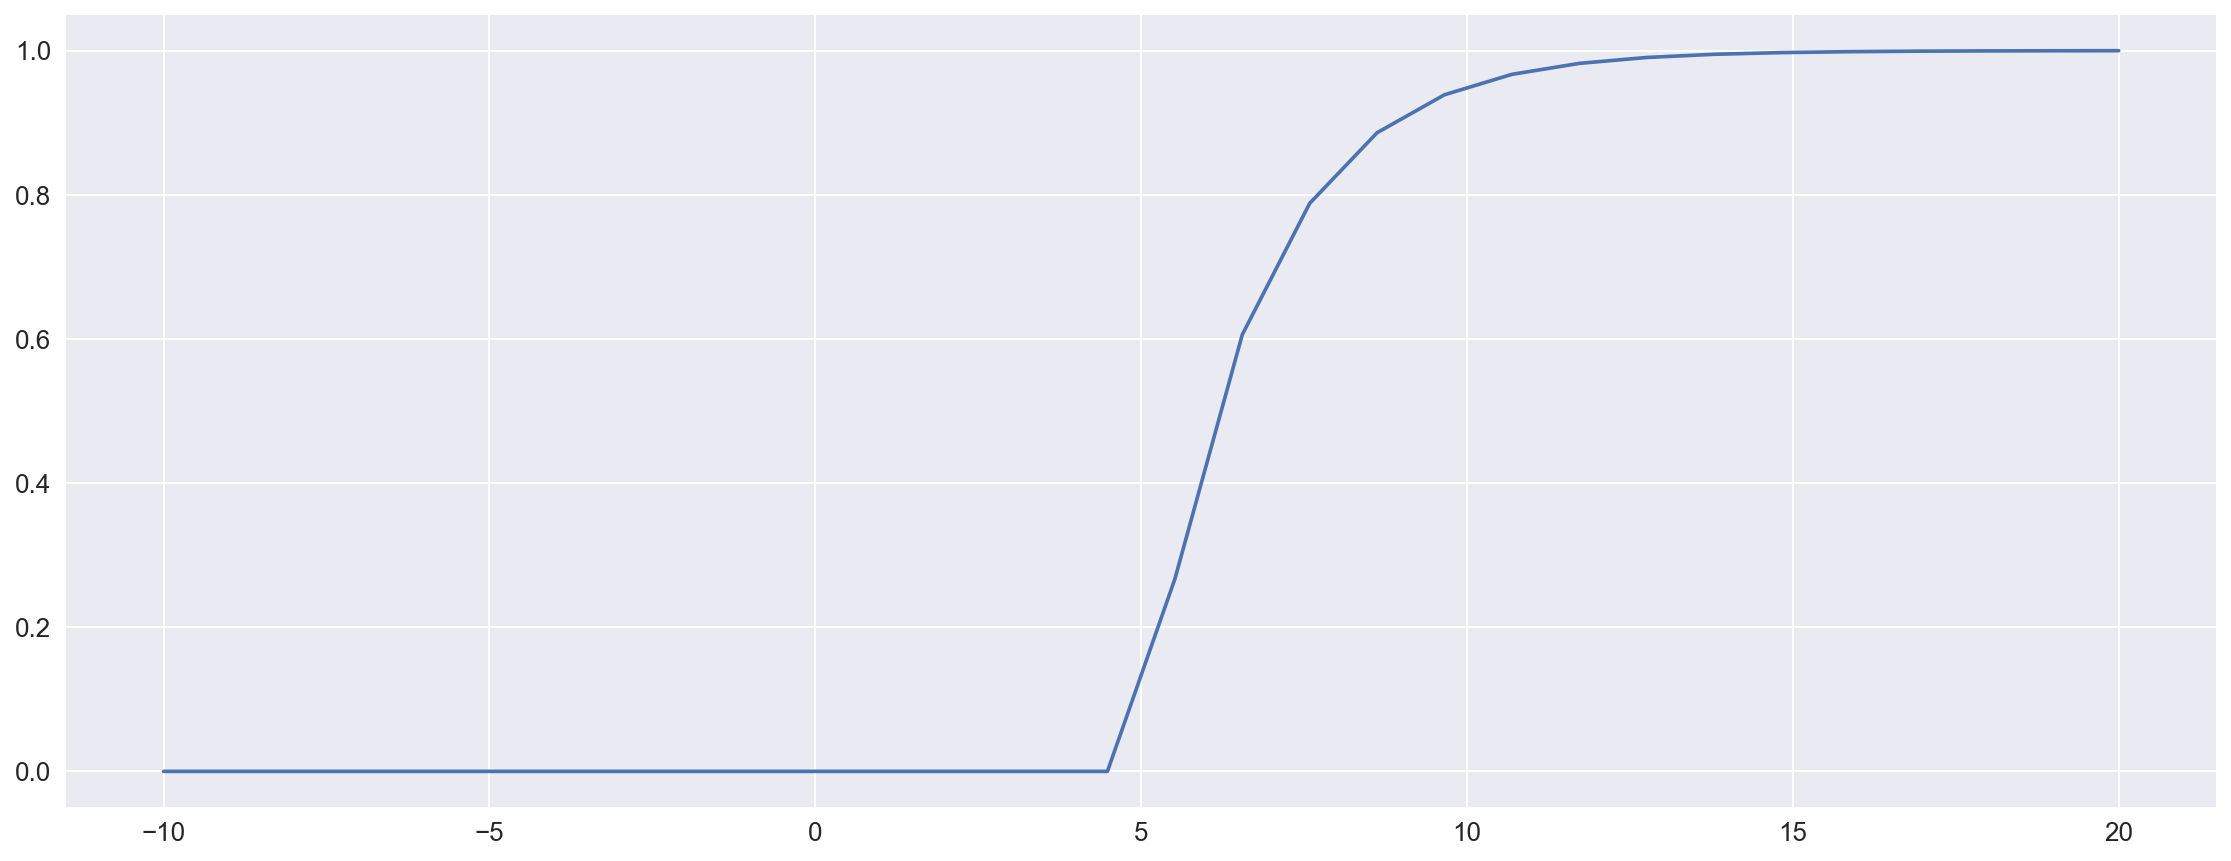

In [141]:
plt.plot(temps, exp_min(temps, np.repeat(5, len(temps))))

In [197]:
def sigmoid_tmin(env_var, tmin):
    return 1.0/(1.0+np.exp(-env_var + tmin))
def sigmoid_tmax(env_var, tmin):
    return 1.0/(1.0+np.exp(env_var - tmin))

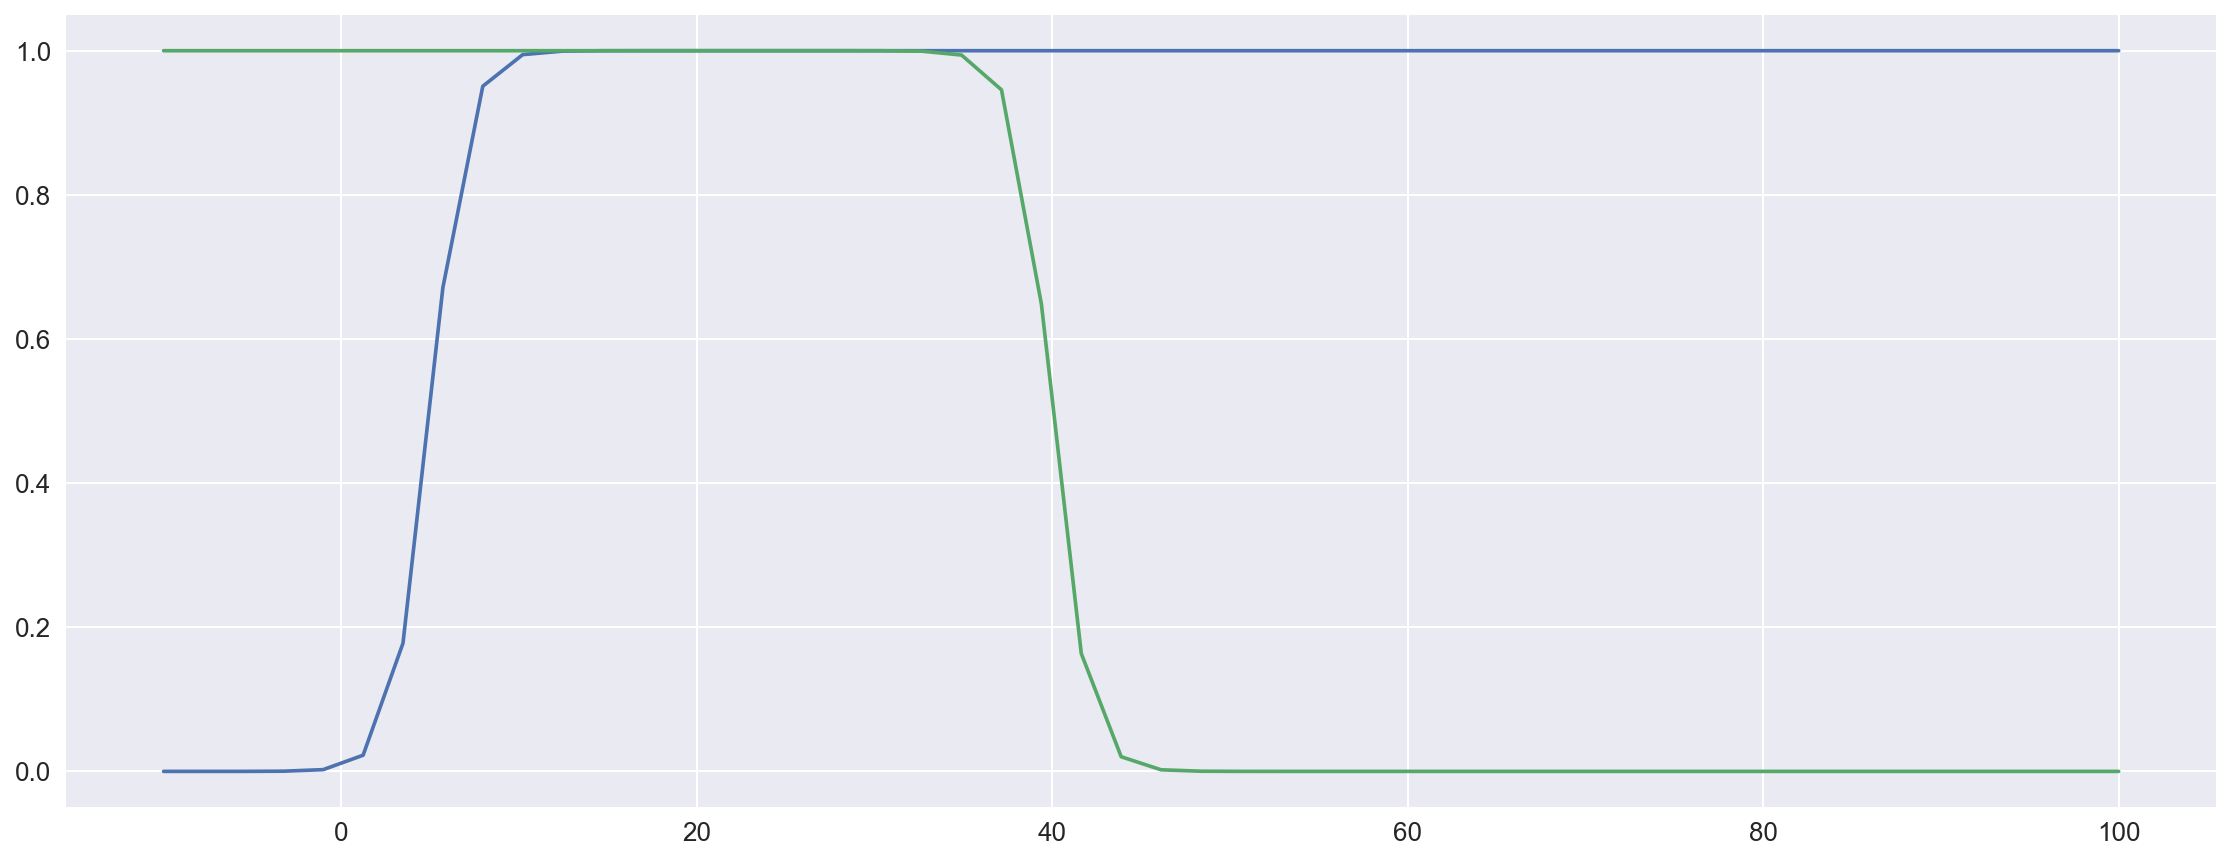

In [190]:
plt.plot(temps, sigmoid_tmin(temps, 5))
plt.plot(temps, sigmoid_tmax(temps, 40))

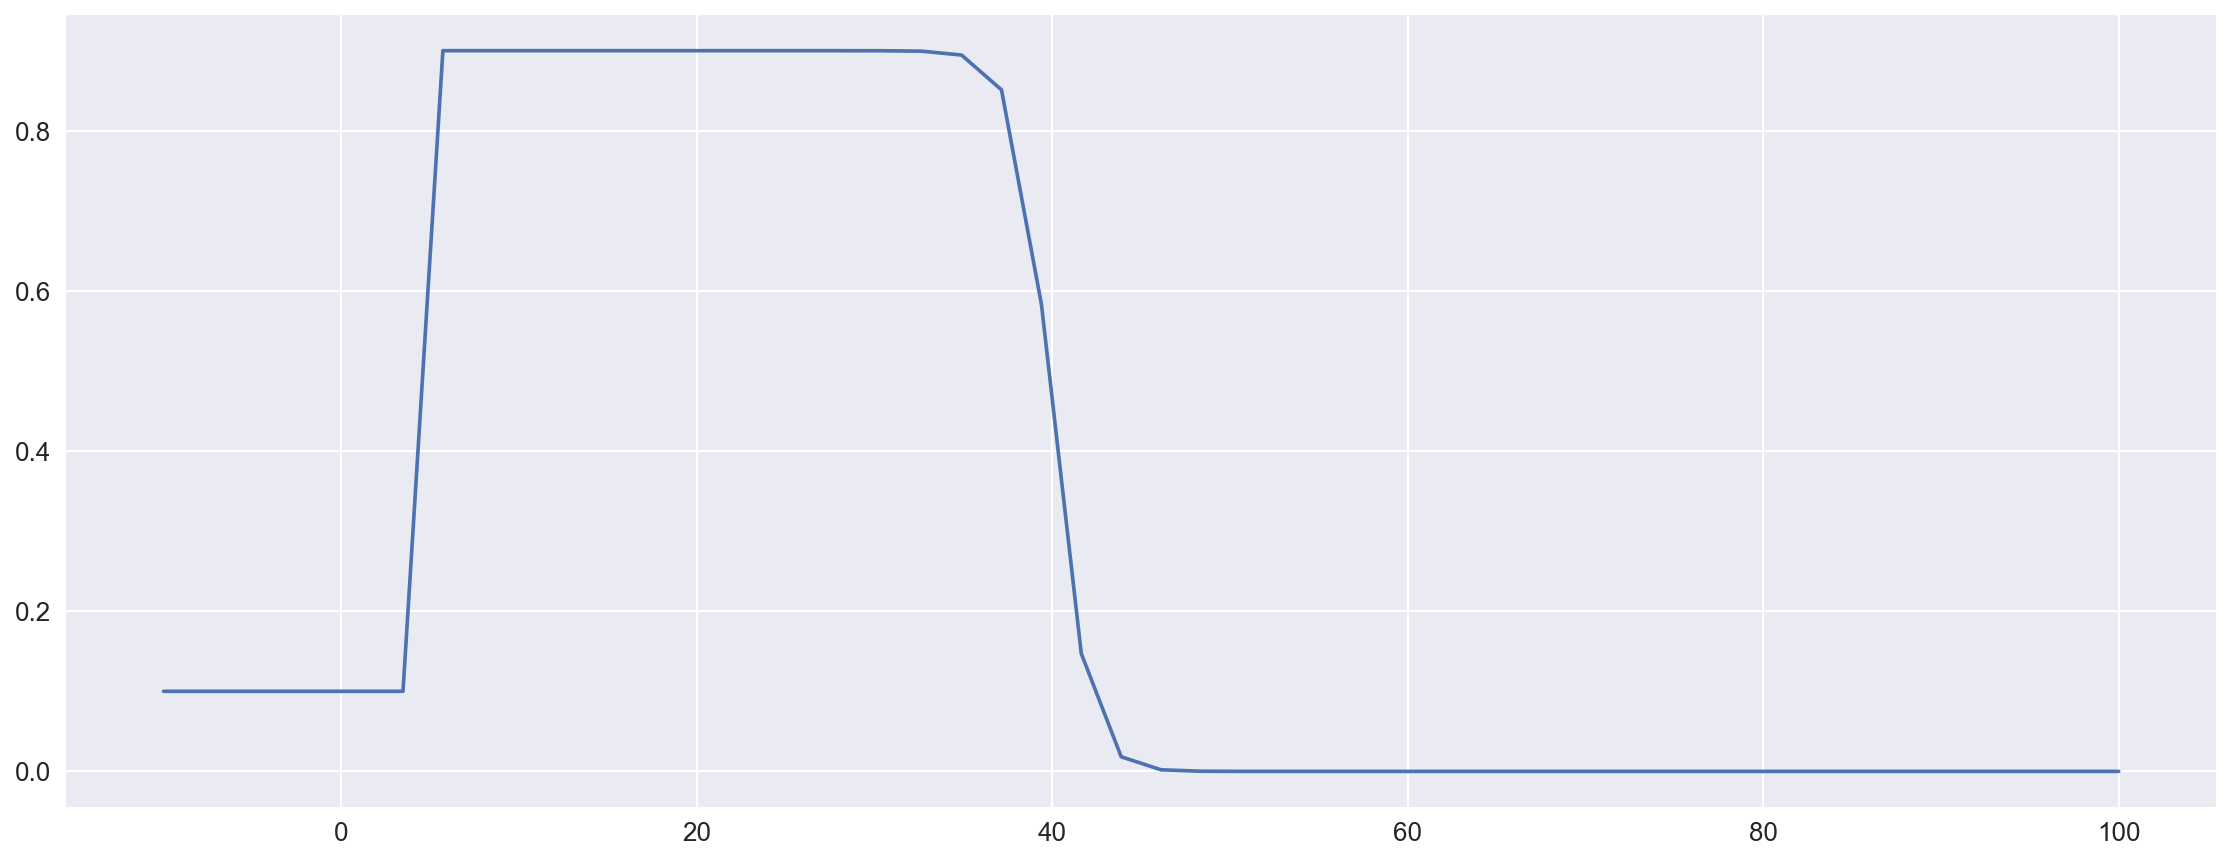

In [191]:
plt.plot(temps, thresh_fitness_min(temps, 5)* sigmoid_tmax(temps, 40))

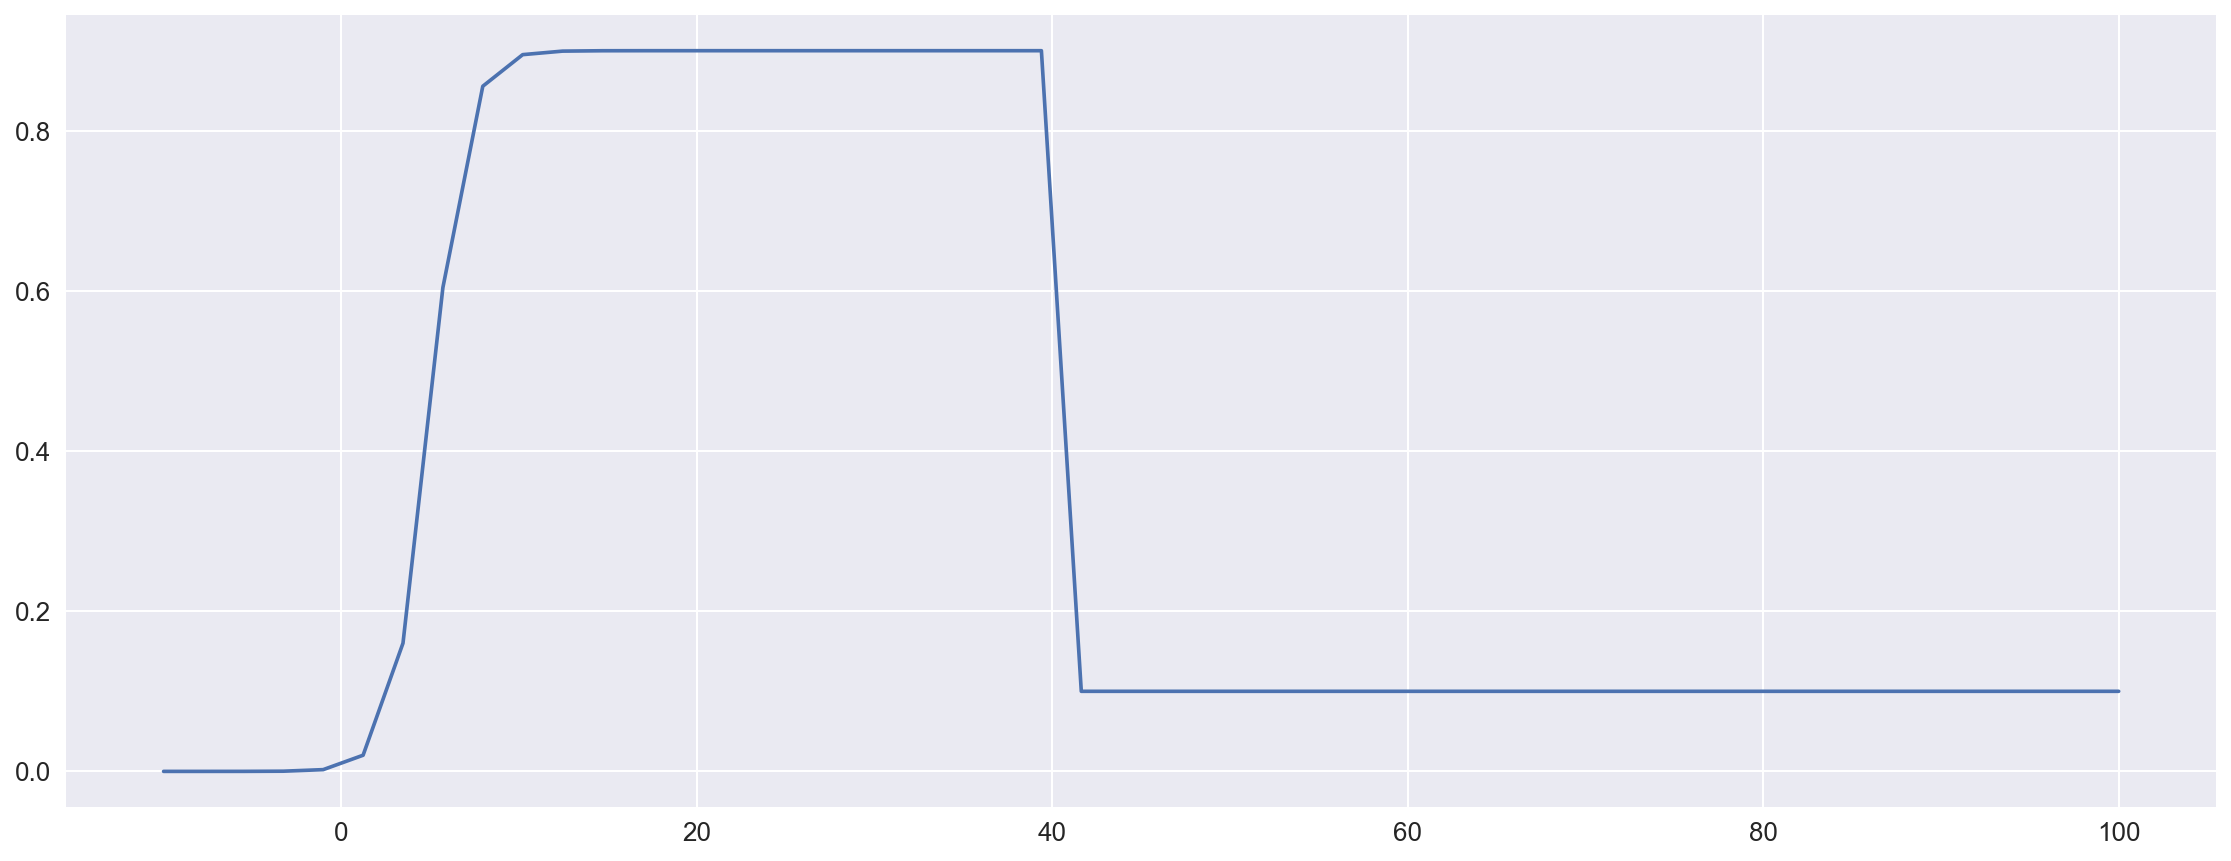

In [200]:
plt.plot(temps, thresh_fitness_max(temps, 40)* sigmoid_tmin(temps, 5))